In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [64]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time 

In [65]:
# read in dataset
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [ ]:
# quick look of the data
# train.describe()
# train.columns
# train.iloc[:2]
# train.shape

In [66]:
org_x_train = train.values[:, 1:]
org_y_train = train.values[:, 0 ]
# type(org_x_train)

Text(0.5,1,'4')

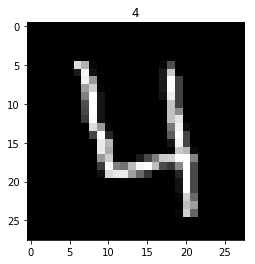

In [67]:
# quick look of the obs, eg lst obs
i = 3
img = org_x_train[i]
img = img.reshape(28, 28)
plt.imshow(img, cmap = 'gray')
plt.title(org_y_train[i])

In [68]:
# data preparation for KNN
nor_x_train = copy.deepcopy(org_x_train)
nor_y_train = copy.deepcopy(org_y_train)
# data normalization; binary values: 0 vs 1
nor_x_train[nor_x_train > 1] = 1
nor_y_train[nor_y_train > 1] = 1

In [69]:
x_train, x_test, y_train, y_test = train_test_split(nor_x_train, nor_y_train, \
                                                    test_size = 0.2, random_state = 87) 

In [70]:
# first try k = 5
k = 5
start = time.time()
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)
predict_res = knn.predict(x_test)
predict_score = accuracy_score(y_test, predict_res)
end = time.time()

In [71]:
print('k = {}'.format(k))
print('socre: {}'.format(predict_score))
print('complete time: {}'.format(end - start))

k = 5
socre: 0.996904761904762
complete time: 562.803295135498


In [73]:
# we try all k from 1 to 6  to pick top preformers
k_score = []
for k in range(1, 6 + 1): 
    print('k = {}'.format(k))
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    predict_res = knn.predict(x_test)
    predict_score = accuracy_score(y_test, predict_res)
    end = time.time()
    k_score.append(predict_score)
    print('Score: {}'.format(predict_score))
    print('Complete time: {}'.format(end - start))

k = 1
Score: 0.9967857142857143
Complete time: -20.363311052322388
k = 2
Score: 0.9955952380952381
Complete time: -579.8881676197052
k = 3
Score: 0.9964285714285714
Complete time: -1143.9782981872559
k = 4
Score: 0.9960714285714286
Complete time: -1707.913459777832
k = 5
Score: 0.996904761904762
Complete time: -2270.654805660248
k = 6
Score: 0.9960714285714286
Complete time: -2832.6776621341705


[0.9967857142857143, 0.9955952380952381, 0.9964285714285714, 0.9960714285714286, 0.996904761904762, 0.9960714285714286]


<function matplotlib.pyplot.show(*args, **kw)>

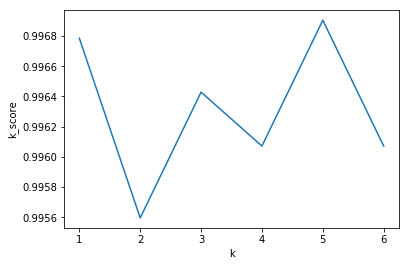

In [74]:
# analyze the performance score
print(k_score)
plt.plot(range(1, 1 + 6), k_score)
plt.xlabel('k')
plt.ylabel('k_score')
plt.show


In [75]:
test = test.values

In [76]:
# pick the best k 
k = 5
print('k = {}'.format(k))
start = time.time()
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)
predict_res = knn.predict(test)
end = time.time()
print('Complete time: {} Secs'.format(end - start))

k = 5
Complete time: 1801.11616897583 Secs


In [79]:
# pd.DataFrame({'ImageId': list(range(1, len(predict_res) + 1)), 
#               'Label': predict_res}).to_csv(Digit_Recogniser_Result.csv, index = False, header = True)